# 1. Regresión

Revisaremos los conceptos de regresión vistos en el teórico.

Haremos pruebas con datos de entrada de **una dimensión**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"

## Función Verdadera Oculta

Usaremos como función oculta un sinusoide.

In [3]:
def create_sinusoidal_data(spread=0.25, data_size=50):
    np.random.seed(0)
    x = np.linspace(0, 1, data_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=spread, size=x.shape)

    return x, y

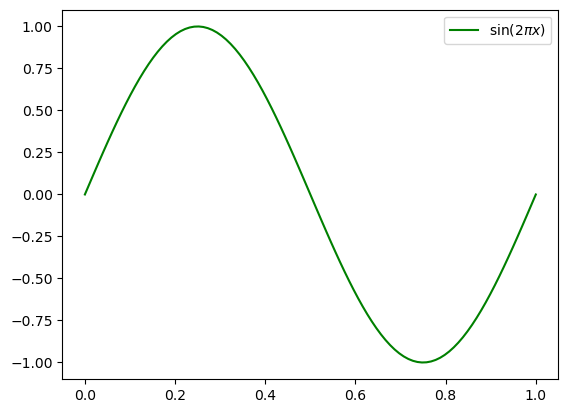

In [4]:
x, f_x = create_sinusoidal_data(0, 100)
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Muestra Ruidosa

Tomaremos puntos uniformes en $x$, ruidosos en $y$.

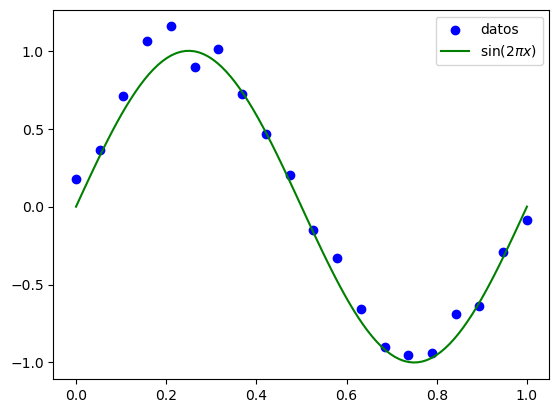

In [5]:
data_size = 20
X, y = create_sinusoidal_data(0.10, data_size)

plt.scatter(X, y, color="blue", label="datos")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [7]:
X

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [8]:
y

array([ 0.17640523,  0.36471519,  0.71208651,  1.0612558 ,  1.15615606,
        0.89885671,  1.01078217,  0.72058819,  0.46562551,  0.20565444,
       -0.15019023, -0.33052004, -0.65962014, -0.90360583, -0.95219817,
       -0.93603283, -0.68775857, -0.63472854, -0.2933927 , -0.08540957])

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [10]:
from sklearn.model_selection import train_test_split

train_size = 5
val_size = data_size - train_size
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=0)

In [11]:
X_train.shape, X_val.shape

((5,), (15,))

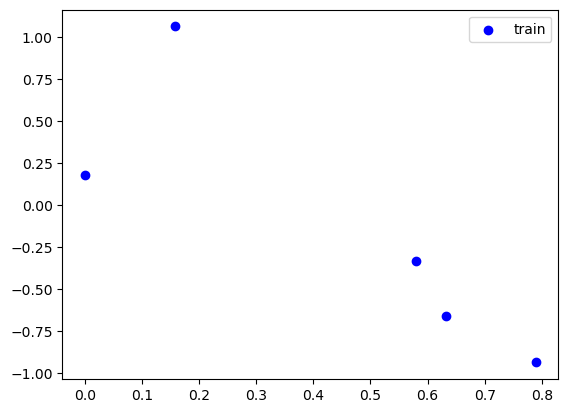

In [16]:
plt.scatter(X_train, y_train, color="blue", label="train")
#plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
#plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Regresión Lineal

Probaremos ajustar los puntos usando una recta.

Vamos a programar a mano el aprendizaje y la predicción.

### Solución de Cuadrados Mínimos

Datos de entrenamiento:
- $X \in R^{N \times K}:$ $N$ vectores de entrada, de $K$ dimensiones cada uno.
- $y \in R^N:$ $N$ valores de salida.

Aprendizaje:

$$w^* = (X^\top X)^{-1} X^\top y$$

Predicción:

$$f_{w^*}(x) = x^\top w^* = \sum_{k=1}^K x_k w^*_k$$

Con $K=1$ tendríamos:

$$f_{w^*}(x) = x_1 w_1^*$$

Para que sea una recta nos falta un $w_0$ ("bias").
Esto se puede resolver haciendo $K=2$ y agregando un valor constante 1 a cada dato:

$$f_{w^*}((1, x)) = w_0 + x_1 w_1^*$$


In [17]:
X_train

array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895])

In [18]:
X_train.shape

(5,)

In [19]:
X_train_bias = np.stack((np.ones(X_train.shape[0]), X_train), axis=1)  # add bias
X_train_bias

array([[1.        , 0.57894737],
       [1.        , 0.15789474],
       [1.        , 0.        ],
       [1.        , 0.78947368],
       [1.        , 0.63157895]])

In [20]:
X_train_bias.shape

(5, 2)

In [26]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

### Entrenar

In [27]:
X_train, y_train

(array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895]),
 array([-0.33052004,  1.0612558 ,  0.17640523, -0.93603283, -0.65962014]))

In [28]:
w = linear_least_squares(X_train, y_train)

In [30]:
w  # qué dimensiones tiene w?

array([-1.95626346,  0.70657973])

### Graficar

Graficaremos la función aprendida a partir de los datos de entrenamiento. También graficaremos con los datos de evaluación y la función oculta, para comparar.

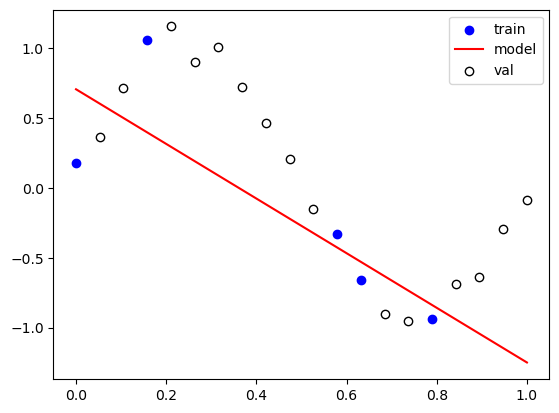

In [39]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.plot(x, f(x, w), color="red", label="model")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
#plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Predecir y Evaluar: Error Cuadrático Medio

Obtendremos los valores predichos para los datos de entrenamiento y de evaluación.
Calcularemos el error cuadrático medio sobre ambos conjuntos de datos.

In [36]:
y_train_pred = f(X_train, w)
y_val_pred = f(X_val, w)

Usamos la función [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) de scikit-learn:

In [40]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 0.151445
Val error: 0.381363


## Regresión Polinomial

Ahora haremos regresión polinomial. En este caso usaremos scikit-learn para definir el modelo, entrenar y predecir.

En scikit-learn cada dato de entrada debe ser un vector, no un número. Debemos convertir cada dato en un vector de una dimensión:

In [42]:
X_train.shape, X_val.shape

((5,), (15,))

In [44]:
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_train.shape, X_val.shape

((5, 1), (15, 1))

### Features Polinomiales

En scikit-learn, la regresión polinomial se implementa como un modelo de dos pasos.

El primer paso genera vectores de características polinomiales, y el segundo paso aplica una regresión lineal sobre estos vectores (ver [Polynomial interpolation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

Por ejemplo, para generar características polinomiales de grado 5:

In [45]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(5)  # polinomio de grado 5
pf.fit(X_train)             # no necesita y_train!

PolynomialFeatures(degree=5)

In [46]:
X_train.shape

(5, 1)

In [47]:
X_train2 = pf.transform(X_train)

In [49]:
X_train2.shape  # qué forma tiene esto?

(5, 6)

In [50]:
X_train[0]

array([0.57894737])

In [51]:
X_train2[0]

array([1.        , 0.57894737, 0.33518006, 0.19405161, 0.11234567,
       0.06504223])

### Instanciar y Entrenar

Crearemos y entrenaremos un modelo de grado 2.

Como siempre en scikit-learn, para entrenar usamos la función **fit**.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [54]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [55]:
# equivalente a:
Z_train = pf.fit_transform(X_train, y_train)
lr.fit(Z_train, y_train)

LinearRegression(fit_intercept=False)

### Inspeccionar Parámetros

Ver [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [56]:
lr.coef_

array([ 0.45340784,  1.62753594, -4.67896686])

In [34]:
lr.intercept_

0.0

### Graficar Resultado

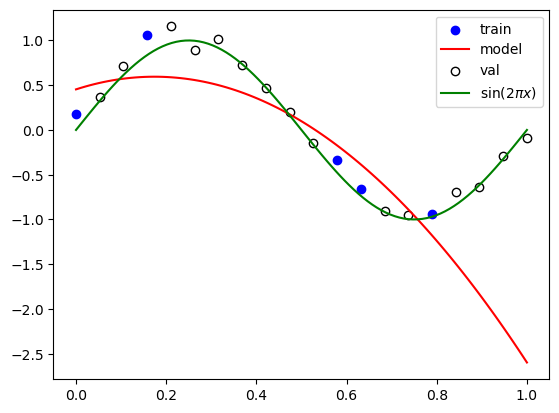

In [59]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Predecir y Evaluar

Para predecir, usamos la función **predict**:

In [60]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [61]:
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 0.091
Test error: 0.87


## Sobreajuste vs. Generalización

Probaremos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:

In [62]:
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

In [63]:
train_errors, val_errors

([0.49661452325600575,
  0.15144544820292924,
  0.09082610739363776,
  0.0008955085900105326,
  1.136591408540016e-29,
  9.219811829770575e-31,
  6.463883116550217e-30,
  3.400884132996757e-30,
  4.2472301951978384e-29,
  3.6085224921610332e-28],
 [0.5391603515420854,
  0.38136282471004473,
  0.8685511508922742,
  0.017667168775628964,
  0.761970430422923,
  0.9951653957825005,
  1.1957007653547664,
  1.3341086088245977,
  1.3926020261710108,
  1.3675834256939783])

Graficaremos las curvas de error en términos del grado del polinomio.

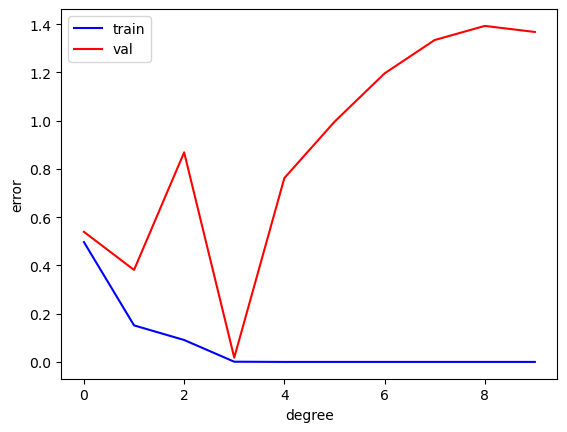

In [64]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Se puede ver que el error en entrenamiento siempre baja, pero que en algún punto comienza el sobreajuste, ya que el error en evaluación empieza a subir.

### Mejor Modelo

De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 3:

In [65]:
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

Graficamos:

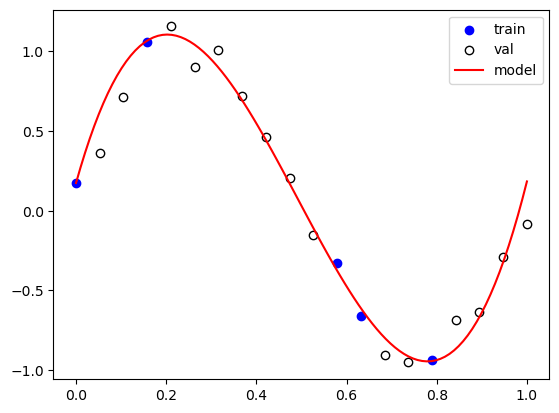

In [69]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
#plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [70]:
train_errors[3], val_errors[3]

(0.0008955085900105326, 0.017667168775628964)

### Modelo Sobreajustado

Veamos cómo es la gráfica de uno de los modelos que sufre de sobreajuste:

In [71]:
degree = 8
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

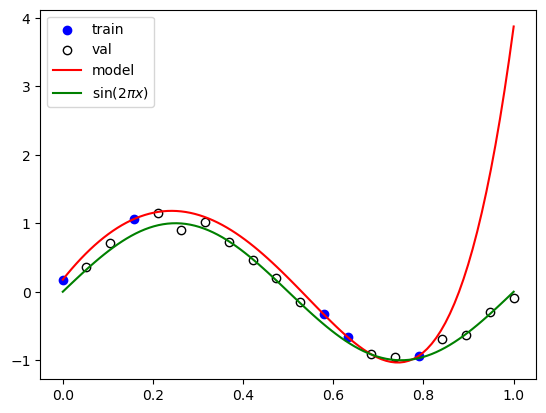

In [72]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Ejercicios

1. Probar agregando puntos a los datos de entrenamiento para prevenir el sobreajuste en polinomios de grado alto.
2. Imprimir los parámetros de los modelos para cada grado.
3. Probar usando regularización para prevenir el sobreajuste en polinomios de grado alto
(ver [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)).
4. Hicimos todo con datos de entrada de una dimensión. ¿Cómo serían los features polinomiales en datos de 2 o más dimensiones?

## Referencias

Scikit-learn:

- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
